In [1]:
#dowmload imdb from keras
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #num_word can make the usage frequency of English kept in the first 10000


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/liangyi/anaconda3/envs/keras/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/liangyi/anaconda3/envs/keras/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different length

In [2]:
print(train_data[0])
print(train_labels[0])#0 is bad review ,1 is good review

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [3]:
word_index = imdb.get_word_index()#get Hash Map of the usage frequency and words ,the key is words and the value is word
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])#reverse the location of the key and the value in word_index

In [4]:
text = ' '
for wordCount in train_data[0]:
    if wordCount > 3:
        text += reverse_word_index.get(wordCount-3)
        text += ' '
    else:
        text += '?'
print(text)

 ?this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ?is an amazing actor and now the same being director ?father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ?and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ?to the two little boy's that played the ?of norman and paul they were just brilliant children are often left out of the ?list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the

In [5]:
'''
description: create a one-hot-vector
'''
import numpy as np 
def oneHotVectorizeText(allText, degree = 10000):
    oneHotMat = np.zeros((len(allText),degree))
    for i, wordFq in enumerate(allText):
        oneHotMat[i,wordFq] = 1.0
    return oneHotMat
x_train = oneHotVectorizeText(train_data)
x_test = oneHotVectorizeText(test_data)
y_trian = np.array(train_labels, dtype=float)
y_test = np.array(test_labels, dtype=float)

In [6]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [7]:
'''
Function Description: create a Network
'''
from keras import models
from keras import layers
#the input layer is of 10000 units, the second and the third layer is of 16 units, the output layer is of only 1 unit
model = models.Sequential()# create a network
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
from keras import losses
from keras import metrics
from keras import optimizers
#set up the F_loss and the learning rate
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy']  )

In [9]:
#set the last 10000 records of test set as validation set
x_val = x_test[:10000]
y_val = y_test[:10000]
#set the first 10000 records of train set as test set
part_x_train = x_train[10000:]
part_y_train = y_trian[10000:]


In [10]:
#to see if  overfit in this model
DataTraining1 = model.fit(part_x_train, part_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
train_result1 = DataTraining1.history

Epoch 1/20
30/30 [==============================] - 3s 68ms/step - loss: 0.5755 - accuracy: 0.7290 - val_loss: 0.4145 - val_accuracy: 0.8425
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3226 - accuracy: 0.9009 - val_loss: 0.3223 - val_accuracy: 0.8809
Epoch 3/20
30/30 [==============================] - 2s 61ms/step - loss: 0.2285 - accuracy: 0.9324 - val_loss: 0.3069 - val_accuracy: 0.8757
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1739 - accuracy: 0.9471 - val_loss: 0.3047 - val_accuracy: 0.8735
Epoch 5/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1390 - accuracy: 0.9616 - val_loss: 0.3037 - val_accuracy: 0.8794
Epoch 6/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1130 - accuracy: 0.9675 - val_loss: 0.3199 - val_accuracy: 0.8731
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0857 - accuracy: 0.9783 - val_loss: 0.3494 - val_accuracy: 0.8689
Epoch 8/20
30

In [11]:
print(train_result1.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


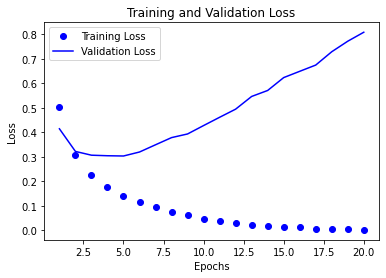

In [12]:
#draw loss, accuracy, val_loss, val_accuracy
import matplotlib.pyplot as plt 
acc = train_result1['accuracy']
val_acc = train_result1['val_accuracy']
loss = train_result1['loss']
val_loss = train_result1['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
#reset the model and set the epochs = 4
model = models.Sequential()# create a network
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_trian, epochs = 4, batch_size = 512)
train_result2 = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 40ms/step - loss: 0.5493 - accuracy: 0.7421
Epoch 2/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2812 - accuracy: 0.9047
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2019 - accuracy: 0.9303
Epoch 4/4
782/782 [==============================] - 27s 35ms/step - loss: 0.2910 - accuracy: 0.8840


In [14]:
model.predict(x_test)

array([[0.21163836],
       [0.9998394 ],
       [0.89156014],
       ...,
       [0.12819308],
       [0.06228268],
       [0.6786622 ]], dtype=float32)